Author: Kevin Jadiya<br>
Student Id: 202111010


Importing necessary libraries


In [ ]:
import numpy as np
from scipy import linalg
from collections import OrderedDict
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from itertools import combinations_with_replacement
from scipy.special import factorial

**Construct the training set T = { (x1,y1),(x2,y2),……,(x400,y400)} using the  relation:**<br>

> Yi = sin(2 π (||xi||) + ϵi<br>



**where ϵi  ~ N(0,0.25) and xi= (xi1,xi2) where xi1 ,xi2 are from U[0,1].**



    

In [ ]:
x1_train = np.random.uniform(0.0,1.0,400)
x2_train = np.random.uniform(0.0,1.0,400)
x1_train=np.sort(x1_train)
x2_train=np.sort(x2_train)

In [ ]:
x_train=np.column_stack((x1_train, x2_train))

In [ ]:
epsilon=np.random.normal(loc=0.0, scale =0.25, size =400) # eplsilon
y_train=np.array([np.sin(2*np.pi*((x1_train[i]**2+x2_train[i]**2)**0.5))+epsilon[i] for i in range(400)]).reshape(400,1)

**Plotting Training data**

Text(0.5, 0, 'Y_train')

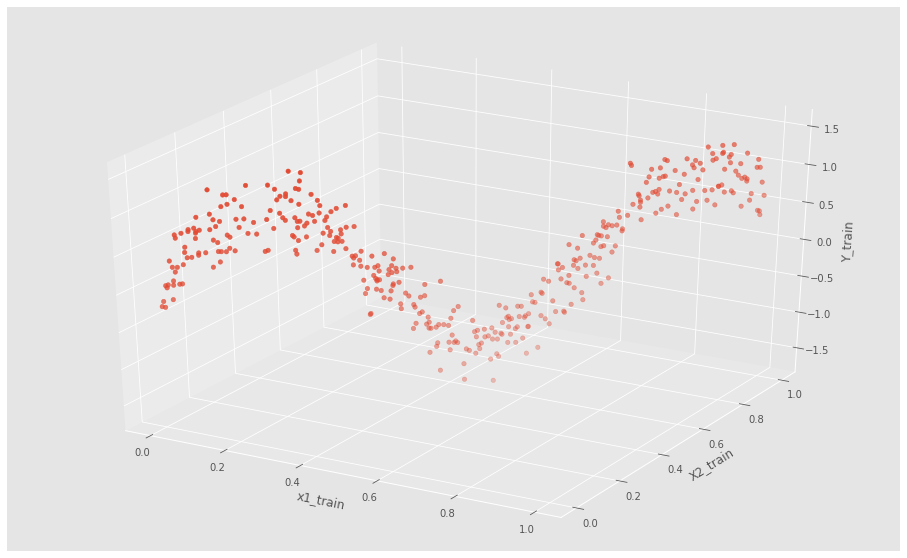

In [ ]:
fig = plt.figure(figsize=(16, 10))

# Create 3D container
ax = plt.axes(projection = '3d')

# Visualize 3D scatter plot
ax.scatter3D(x1_train, x2_train,y_train)

# Give labels
ax.set_xlabel('x1_train')
ax.set_ylabel('X2_train')
ax.set_zlabel('Y_train')


 **Constructing a testing set of size 200**<br>
  I,e. Test =  { (x’1,y’1),(x’2,y’2),……,(x’200,y’200)}

In [ ]:
x1_test = np.random.uniform(0.0,1.0,200)
x2_test = np.random.uniform(0.0,1.0,200)
x1_test = np.sort(x1_test)
x2_test = np.sort(x2_test)

In [ ]:
x_test=np.column_stack((x1_test, x2_test))

In [ ]:
epsilon=np.random.normal(loc=0.0, scale =0.25, size =200) # eplsilon
y_test=np.array([np.sin(2*np.pi*((x1_test[i]**2+x2_test[i]**2)**0.5))+epsilon[i] for i in range(200)]).reshape(200,1)

Text(0.5, 0, 'Y_train')

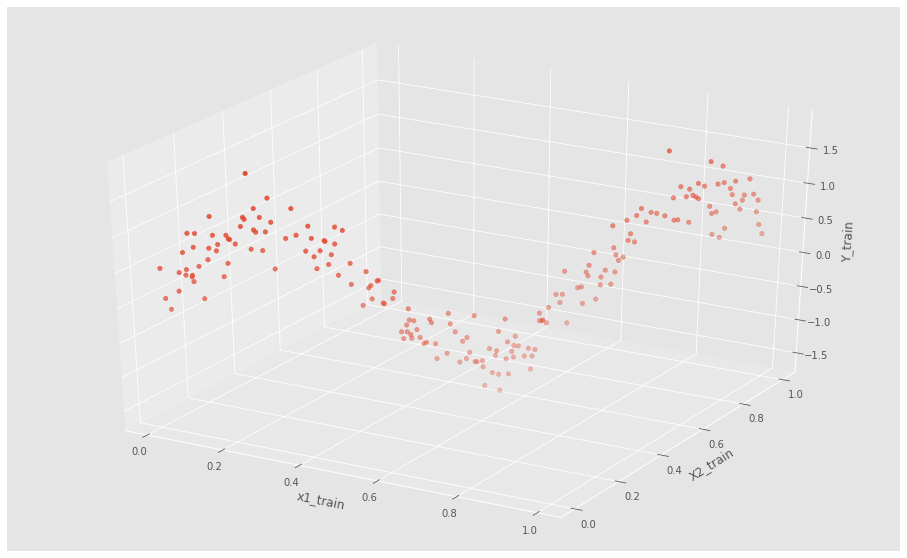

In [ ]:
fig = plt.figure(figsize=(16, 10))

# Create 3D container
ax = plt.axes(projection = '3d')

# Visualize 3D scatter plot
ax.scatter3D(x1_test, x2_test,y_test)

# Give labels
ax.set_xlabel('x1_train')
ax.set_ylabel('X2_train')
ax.set_zlabel('Y_train')

In [ ]:
def RMSE(y, y_pred):
      
    #Calculating .
    loss = np.mean((y_pred - y)**2)
    loss=np.sqrt(loss)
    return loss

# Calulating gradient of loss w.r.t parameters(weights and bias).
def gradients(X, y, y_hat,lamda,w):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    dw = (1/m)*np.dot(X.T, (y_hat - y)) + lamda * w
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

def x_transform(X, degrees):
    
    # Make sure input is numpy array.
    X = np.array(X)
    # Store number of input features in attribute.
    n_input_features = X.shape[1]
    # Calculate numerator and denominator of equation listed above.
    numerator = factorial(n_input_features + degrees[-1])
    denominator = factorial(degrees[-1]) * factorial(n_input_features)
    # Calculate number of output features minus 1 to subtract bias term.
    n_output_features = int(numerator / denominator) - 1

# Generate all combination of feature indices and store them in tuples.
    combos = [combinations_with_replacement(range(n_input_features),i)
                for i in range(1, degrees[-1] + 1)]
        # Create list of tuples containing feature index combinations.
    combinations = [item for sublist in combos for item in sublist]
        # Create new array of the desired output shape.
    X_new = np.empty((X.shape[0],n_output_features))
        # Multiply features for each combination tuple in combinations.
    for i, index_combos in enumerate(combinations):
        X_new[:, i] = np.prod(X[:, index_combos], axis=1)

    return X_new



def train(X, y, bs, degrees, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    # lr --> Learning rate.
    
    # Adding features to input X if degree is not equal to 1 .
    if degrees[0]!=1:
      x = x_transform(X, degrees)
    else:
      x=X
    
    # m-> number of training examples
    # n-> number of features 
    m, n = x.shape
    print(m,n)
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0

    lamda=0.00000001
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches.
            start_i = i*bs
            end_i = start_i + bs
            xb = x[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis
            y_hat = np.dot(xb, w) + b
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat,lamda,w)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = RMSE(y, np.dot(x, w) + b)
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

# Predicting function.
def predict(X, w, b, degrees):
    
    # X --> Input.
    # w --> weights (parameter).
    # b --> bias (parameter).
    #degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    
    # Adding degrees to input X.
    if degrees[0]!=1:
      x1 = x_transform(X, degrees)
    else:
      x1=X
    
    # Returning predictions.
    return np.dot(x1, w) + b



In [ ]:
#m=3
weights1, bias1, error1 = train(x_train, y_train, bs=50, degrees=[1], epochs=500000,lr=0.01)
weights2, bias2, error2 = train(x_train, y_train, bs=50, degrees=[2], epochs=500000,lr=0.01)
weights5, bias5, error5 = train(x_train, y_train, bs=50, degrees=[2,3,4,5], epochs=500000,lr=0.01)


coefficient_3=[]
coefficient_3.append(bias1)
for i in range(len(weights1)):
  coefficient_3.append(weights1[i][0])



400 2
400 5
400 20


Text(0.5, 0, 'Y_train')

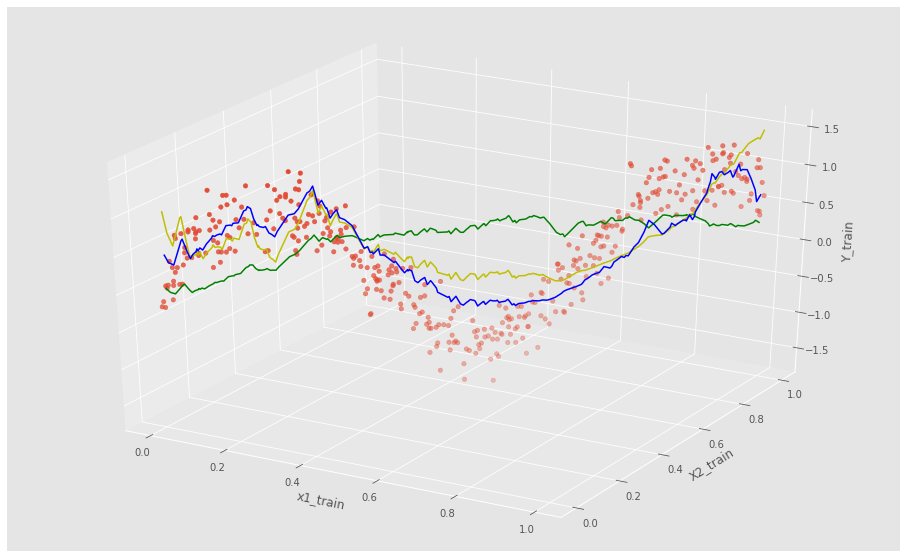

In [ ]:
# Plotting
y_predict1=predict(x_test, weights1, bias1, [1])
y_predict2=predict(x_test, weights2, bias2, [2])
y_predict5=predict(x_test, weights5, bias5, [2,3,4,5])

fig = plt.figure(figsize=(16, 10))

# Create 3D container
ax = plt.axes(projection = '3d')
ax.scatter3D(x1_train,x2_train,y_train)
# Visualize 3D scatter plot
ax.plot3D(x1_test, x2_test,y_predict1.flatten(),'g')
ax.plot3D(x1_test, x2_test,y_predict2.flatten(),'y')
ax.plot3D(x1_test, x2_test,y_predict5.flatten(),'b')



# Give labels
ax.set_xlabel('x1_train')
ax.set_ylabel('X2_train')
ax.set_zlabel('Y_train')

In [ ]:
loss1=RMSE(y_test,y_predict1)
loss2=RMSE(y_test,y_predict2)
loss5=RMSE(y_test,y_predict5)
print(loss1,loss2,loss5)

0.9483911373533856 0.6103095520977929 0.45216903138066306
